## SHOWING HYPERPARAMETRIZATION RESULTS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('best_xgb_params.json/cv_results_all.csv')
df.head()

,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree
0,"{'subsample': 0.9, 'reg_lambda': 10, 'reg_alph...",18.467380,10.204807,0.140895,0.074068,-0.584492,-0.585964,-0.583622,-0.583475,-0.584388,0.000989,6,0.9,10,1.0,200,6,0.05,0.6
1,"{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha...",32.201048,10.792054,0.258653,0.220720,-0.592163,-0.592672,-0.590298,-0.590179,-0.591328,0.001105,38,0.8,5,0.5,300,6,0.01,1.0
2,"{'subsample': 0.9, 'reg_lambda': 10, 'reg_alph...",23.432058,8.142379,0.438535,0.255939,-0.586143,-0.586629,-0.584446,-0.584029,-0.585312,0.001098,14,0.9,10,0.1,100,6,0.10,0.8
3,"{'subsample': 0.8, 'reg_lambda': 20, 'reg_alph...",37.044145,0.487761,0.464810,0.176649,-0.598520,-0.597845,-0.596361,-0.596292,-0.597254,0.000959,45,0.8,20,0.5,200,8,0.01,0.6
4,"{'subsample': 0.8, 'reg_lambda': 20, 'reg_alph...",20.873157,8.145330,0.353366,0.115749,-0.587315,-0.587679,-0.585213,-0.584985,-0.586298,0.001209,21,0.8,20,0.0,100,8,0.05,1.0


/tmp/ipykernel_2569046/2645259511.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


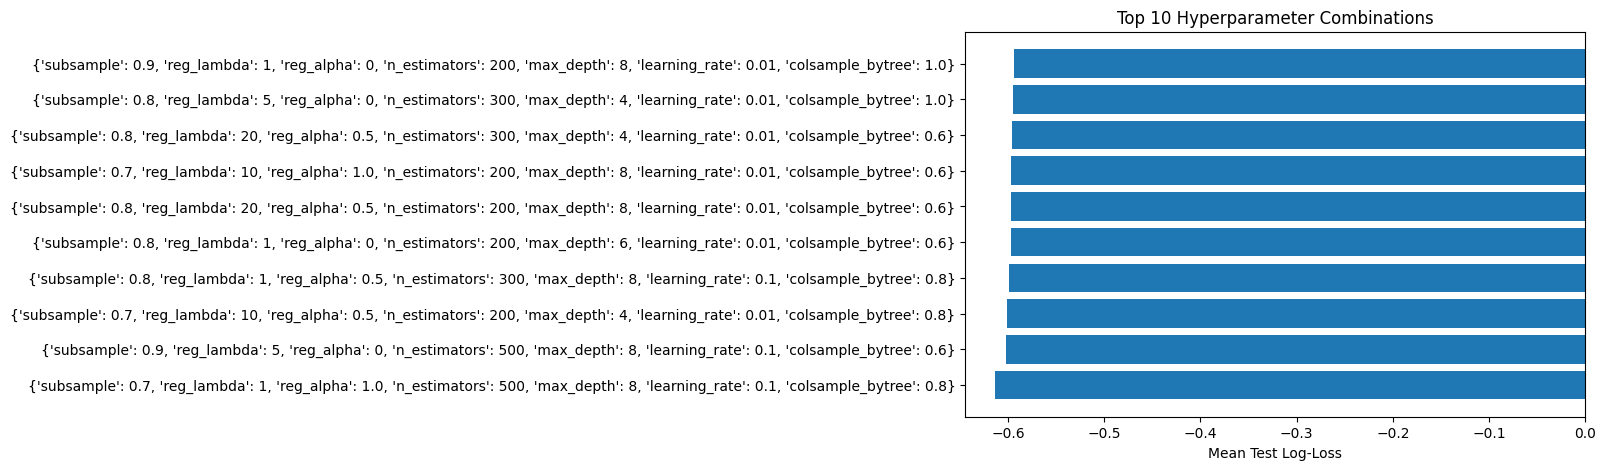

In [3]:
# Cell 2: Top 10 hyperparam combos by mean test log-loss
top10 = df.nsmallest(10, 'mean_test_score')
plt.figure(figsize=(8, 5))
plt.barh(top10['params'], top10['mean_test_score'])
plt.xlabel('Mean Test Log-Loss')
plt.title('Top 10 Hyperparameter Combinations')
plt.tight_layout()
plt.show()


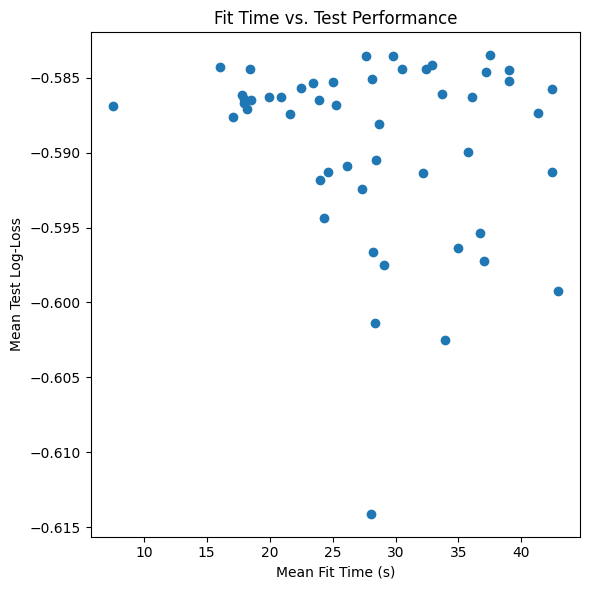

In [4]:
# Cell 3: Fit time vs. test log-loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(df['mean_fit_time'], df['mean_test_score'])
plt.xlabel('Mean Fit Time (s)')
plt.ylabel('Mean Test Log-Loss')
plt.title('Fit Time vs. Test Performance')
plt.tight_layout()
plt.show()


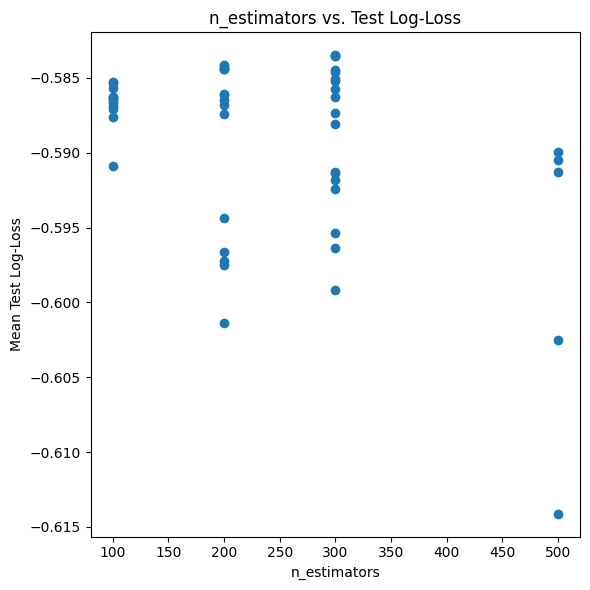

In [5]:
# Cell 4: n_estimators vs. test log-loss scatter
plt.figure(figsize=(6, 6))
plt.scatter(df['param_n_estimators'], df['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Log-Loss')
plt.title('n_estimators vs. Test Log-Loss')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

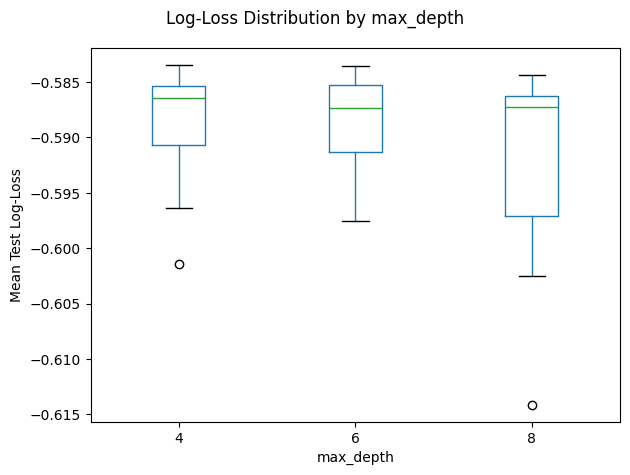

In [6]:
# Cell 5: Boxplot of log-loss by max_depth
df['max_depth_str'] = df['param_max_depth'].astype(str)
plt.figure(figsize=(8, 5))
df.boxplot(column='mean_test_score', by='max_depth_str', grid=False)
plt.xlabel('max_depth')
plt.ylabel('Mean Test Log-Loss')
plt.title('')           # remove automatic subtitle
plt.suptitle('Log-Loss Distribution by max_depth')
plt.tight_layout()
plt.show()
